# K-beauty 온라인 판매 동향 조사

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [135]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [136]:
from IPython.display import set_matplotlib_formats

In [137]:
set_matplotlib_formats('retina')

## 데이터 전처리

In [22]:
df_raw = pd.read_csv('data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200516130031.csv', encoding='cp949')

In [24]:
df_raw.shape

(450, 28)

In [25]:
df_raw['국가(대륙)별'].value_counts()

중동            45
EU            45
아세안(ASEAN)    45
대양주           45
기타            45
합계            45
미국            45
중국            45
중남미           45
일본            45
Name: 국가(대륙)별, dtype: int64

In [26]:
df_raw[df_raw['국가(대륙)별'] == '미국']

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2019
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,53209,42679,40207,37631,48978,40918,44861,55386,53848,195013
46,미국,합계,면세점,-,-,-,-,-,-,-,...,12177,5184,3603,2317,2079,2657,2951,1818,1481,8907
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,41032,37495,36604,35314,46899,38261,41910,53568,52367,186106
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,854,2033,1553,1784,1774,1298,1408,1653,1382,5741
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,1,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,854,2033,1553,1784,1773,1298,1408,1653,1382,5741
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2394,1737,1716,1723,1886,1845,1837,3166,1785,8633
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,32,65,38,72,52,66,116,107,49,338
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2362,1672,1678,1651,1834,1779,1721,3059,1736,8295
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,125,175,251,172,269,88,156,118,338,700


### Tidy 데이터 만들기

In [15]:
# tidy 데이터란 데이터의 모양이나 위치를 바꾸는 것으로 위의 자료의 경우 열에 있는 데이터를 행의 데이터로 만들 것이다.

In [27]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2019'],
      dtype='object')

In [31]:
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='판매액(백만원)')
# 분기와 관련된 열들의 이름은 variable로 해당 열들의 값들은 value로 열이 만들어짐
df.shape

(11250, 5)

In [32]:
df.info()
# object 타입으로 되어있기 때문에 전처리가 필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   11250 non-null  object
 1   상품군별      11250 non-null  object
 2   판매유형별     11250 non-null  object
 3   기간        11250 non-null  object
 4   판매액(백만원)  11250 non-null  object
dtypes: object(5)
memory usage: 439.6+ KB


### 기간에서 연도 분리하기

In [36]:
type('2014 1/4'.split()[0])

str

In [37]:
int('2014 1/4'.split()[0])

2014

In [ ]:
# split 함수를 사용해서 df['기간']에 있는 연도를 분리해보자
# 그러기 위해서 map이라는 함수를 사용해야한다.
# lambda는 익명함수

In [40]:
df['연도'] = df['기간'].map(lambda x: int(x.split()[0]))

In [55]:
df.tail()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도
11245,기타,생활용품 및 자동차용품,면세점,2019,0,2019
11246,기타,생활용품 및 자동차용품,면세점 이외,2019,1792,2019
11247,기타,기 타,계,2019,2963,2019
11248,기타,기 타,면세점,2019,2,2019
11249,기타,기 타,면세점 이외,2019,2961,2019


In [45]:
'2015 1/4'.split()[1].split('/')[0]

'1'

In [60]:
# df['기간'].str.contains('2019')

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019
10797,기타,기 타,계,2019 4/4,1094,2019
10798,기타,기 타,면세점,2019 4/4,1,2019
10799,기타,기 타,면세점 이외,2019 4/4,1093,2019


In [83]:
df_no2019['분기'] = df_no2019['기간'].map(lambda x : int(x.split()[1].split('/')[0])).copy()

In [84]:
df_no2019

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,0.0,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,0.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,0.0,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [87]:
df_no2019['판매액(백만원)'] = df_no2019['판매액(백만원)'].replace("-", pd.np.nan).astype('float')

C:\Users\asdfa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [183]:
df_no2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가(대륙)별   9072 non-null   object 
 1   상품군별      9072 non-null   object 
 2   판매유형별     9072 non-null   object 
 3   기간        9072 non-null   object 
 4   판매액(백만원)  9072 non-null   float64
 5   연도        9072 non-null   int64  
 6   분기        9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [89]:
df_no2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가(대륙)별   9072 non-null   object 
 1   상품군별      9072 non-null   object 
 2   판매유형별     9072 non-null   object 
 3   기간        9072 non-null   object 
 4   판매액(백만원)  9072 non-null   float64
 5   연도        9072 non-null   int64  
 6   분기        9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [90]:
# 필요없는 행 삭제하기
df_no2019 = df_no2019[(df_no2019['국가(대륙)별'] != '합계') & (df_no2019['상품군별'] != '합계')].copy()
df_no2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가(대륙)별   9072 non-null   object 
 1   상품군별      9072 non-null   object 
 2   판매유형별     9072 non-null   object 
 3   기간        9072 non-null   object 
 4   판매액(백만원)  9072 non-null   float64
 5   연도        9072 non-null   int64  
 6   분기        9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [91]:
# 결측치 삭제하기
df_no2019.isnull().sum()

국가(대륙)별     0
상품군별        0
판매유형별       0
기간          0
판매액(백만원)    0
연도          0
분기          0
dtype: int64

In [92]:
df_no2019 = df_no2019.fillna(0)

In [93]:
df_no2019.isnull().sum()

국가(대륙)별     0
상품군별        0
판매유형별       0
기간          0
판매액(백만원)    0
연도          0
분기          0
dtype: int64

In [94]:
df_no2019

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,0.0,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,0.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,0.0,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


## 시각화하기

### 전체 상품군 판매액

In [98]:
df_total = df_no2019[df_no2019['판매유형별'] == '계']

In [99]:
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


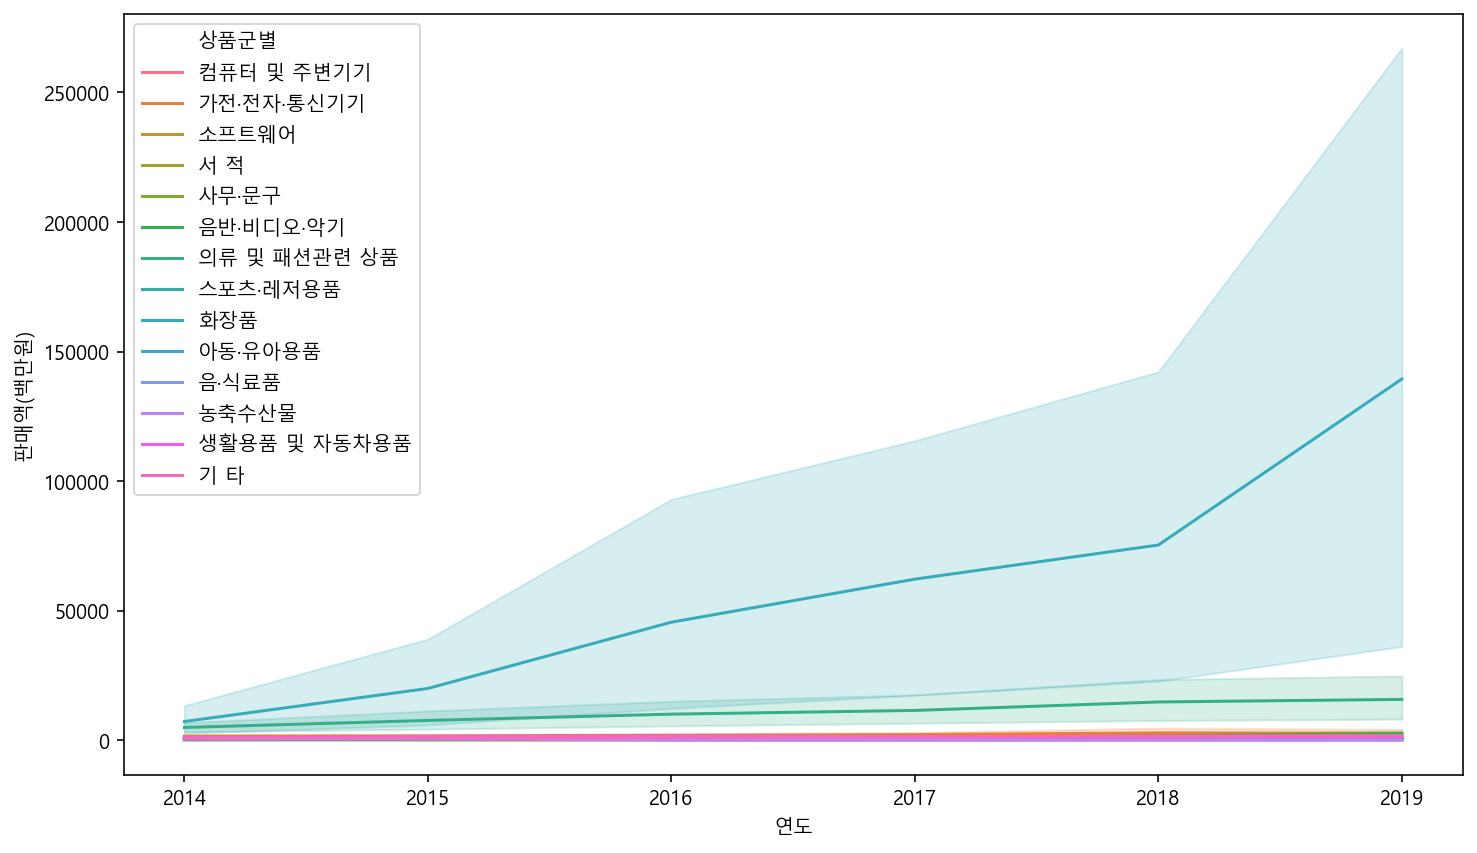

In [102]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_total, x='연도', y='판매액(백만원)', hue='상품군별')

No handles with labels found to put in legend.


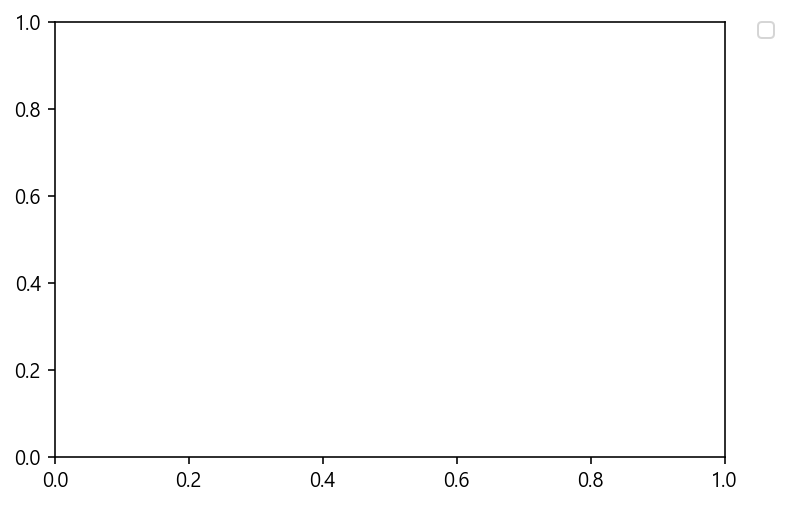

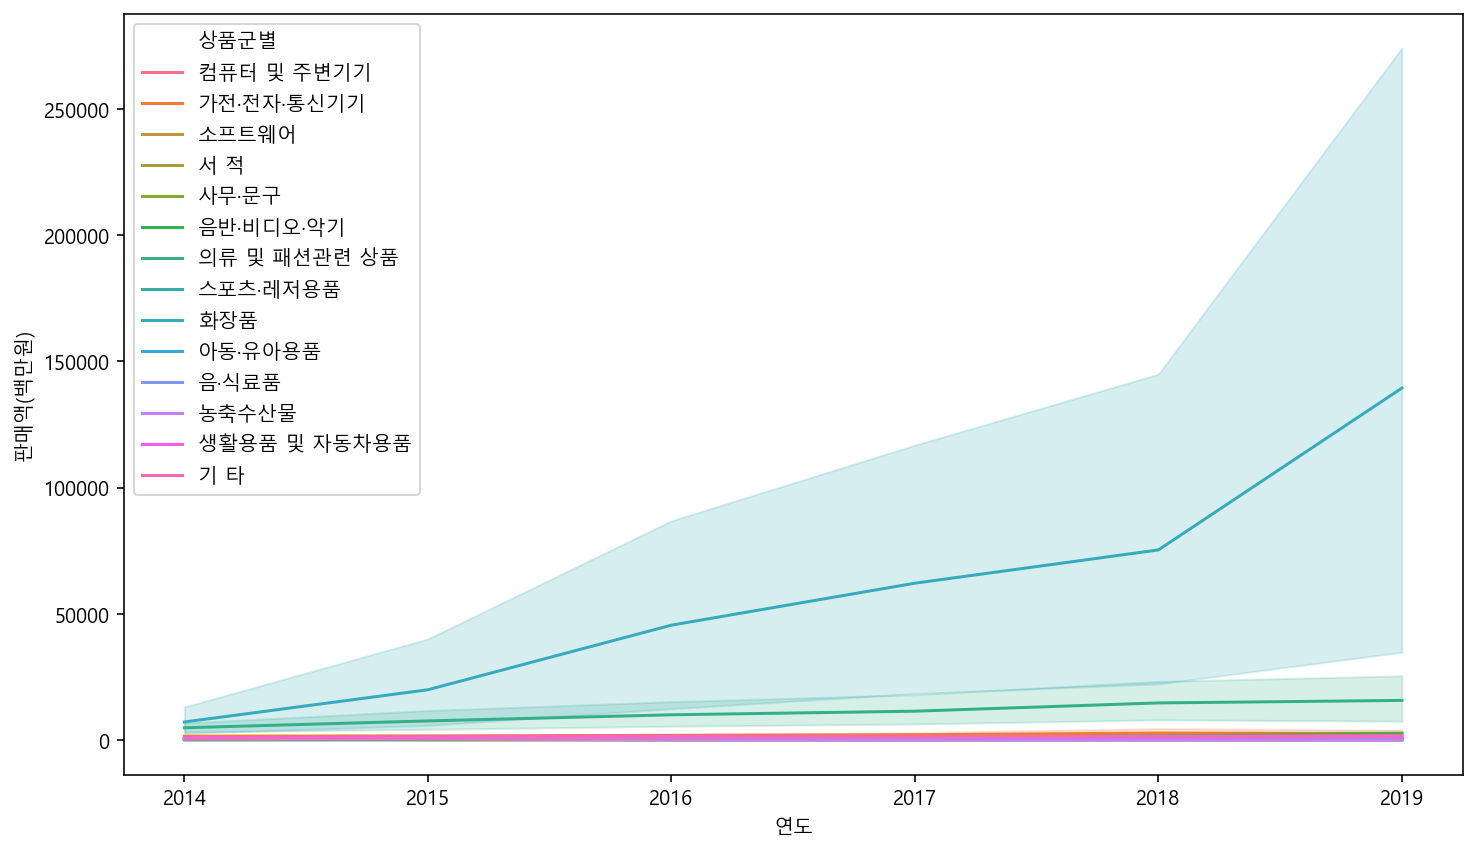

In [105]:
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend 값을 밖으로 끄집어내는 코드
plt.figure(figsize=(12,7))
sns.lineplot(data=df_total, x='연도', y='판매액(백만원)', hue='상품군별')

<Figure size 360x360 with 0 Axes>

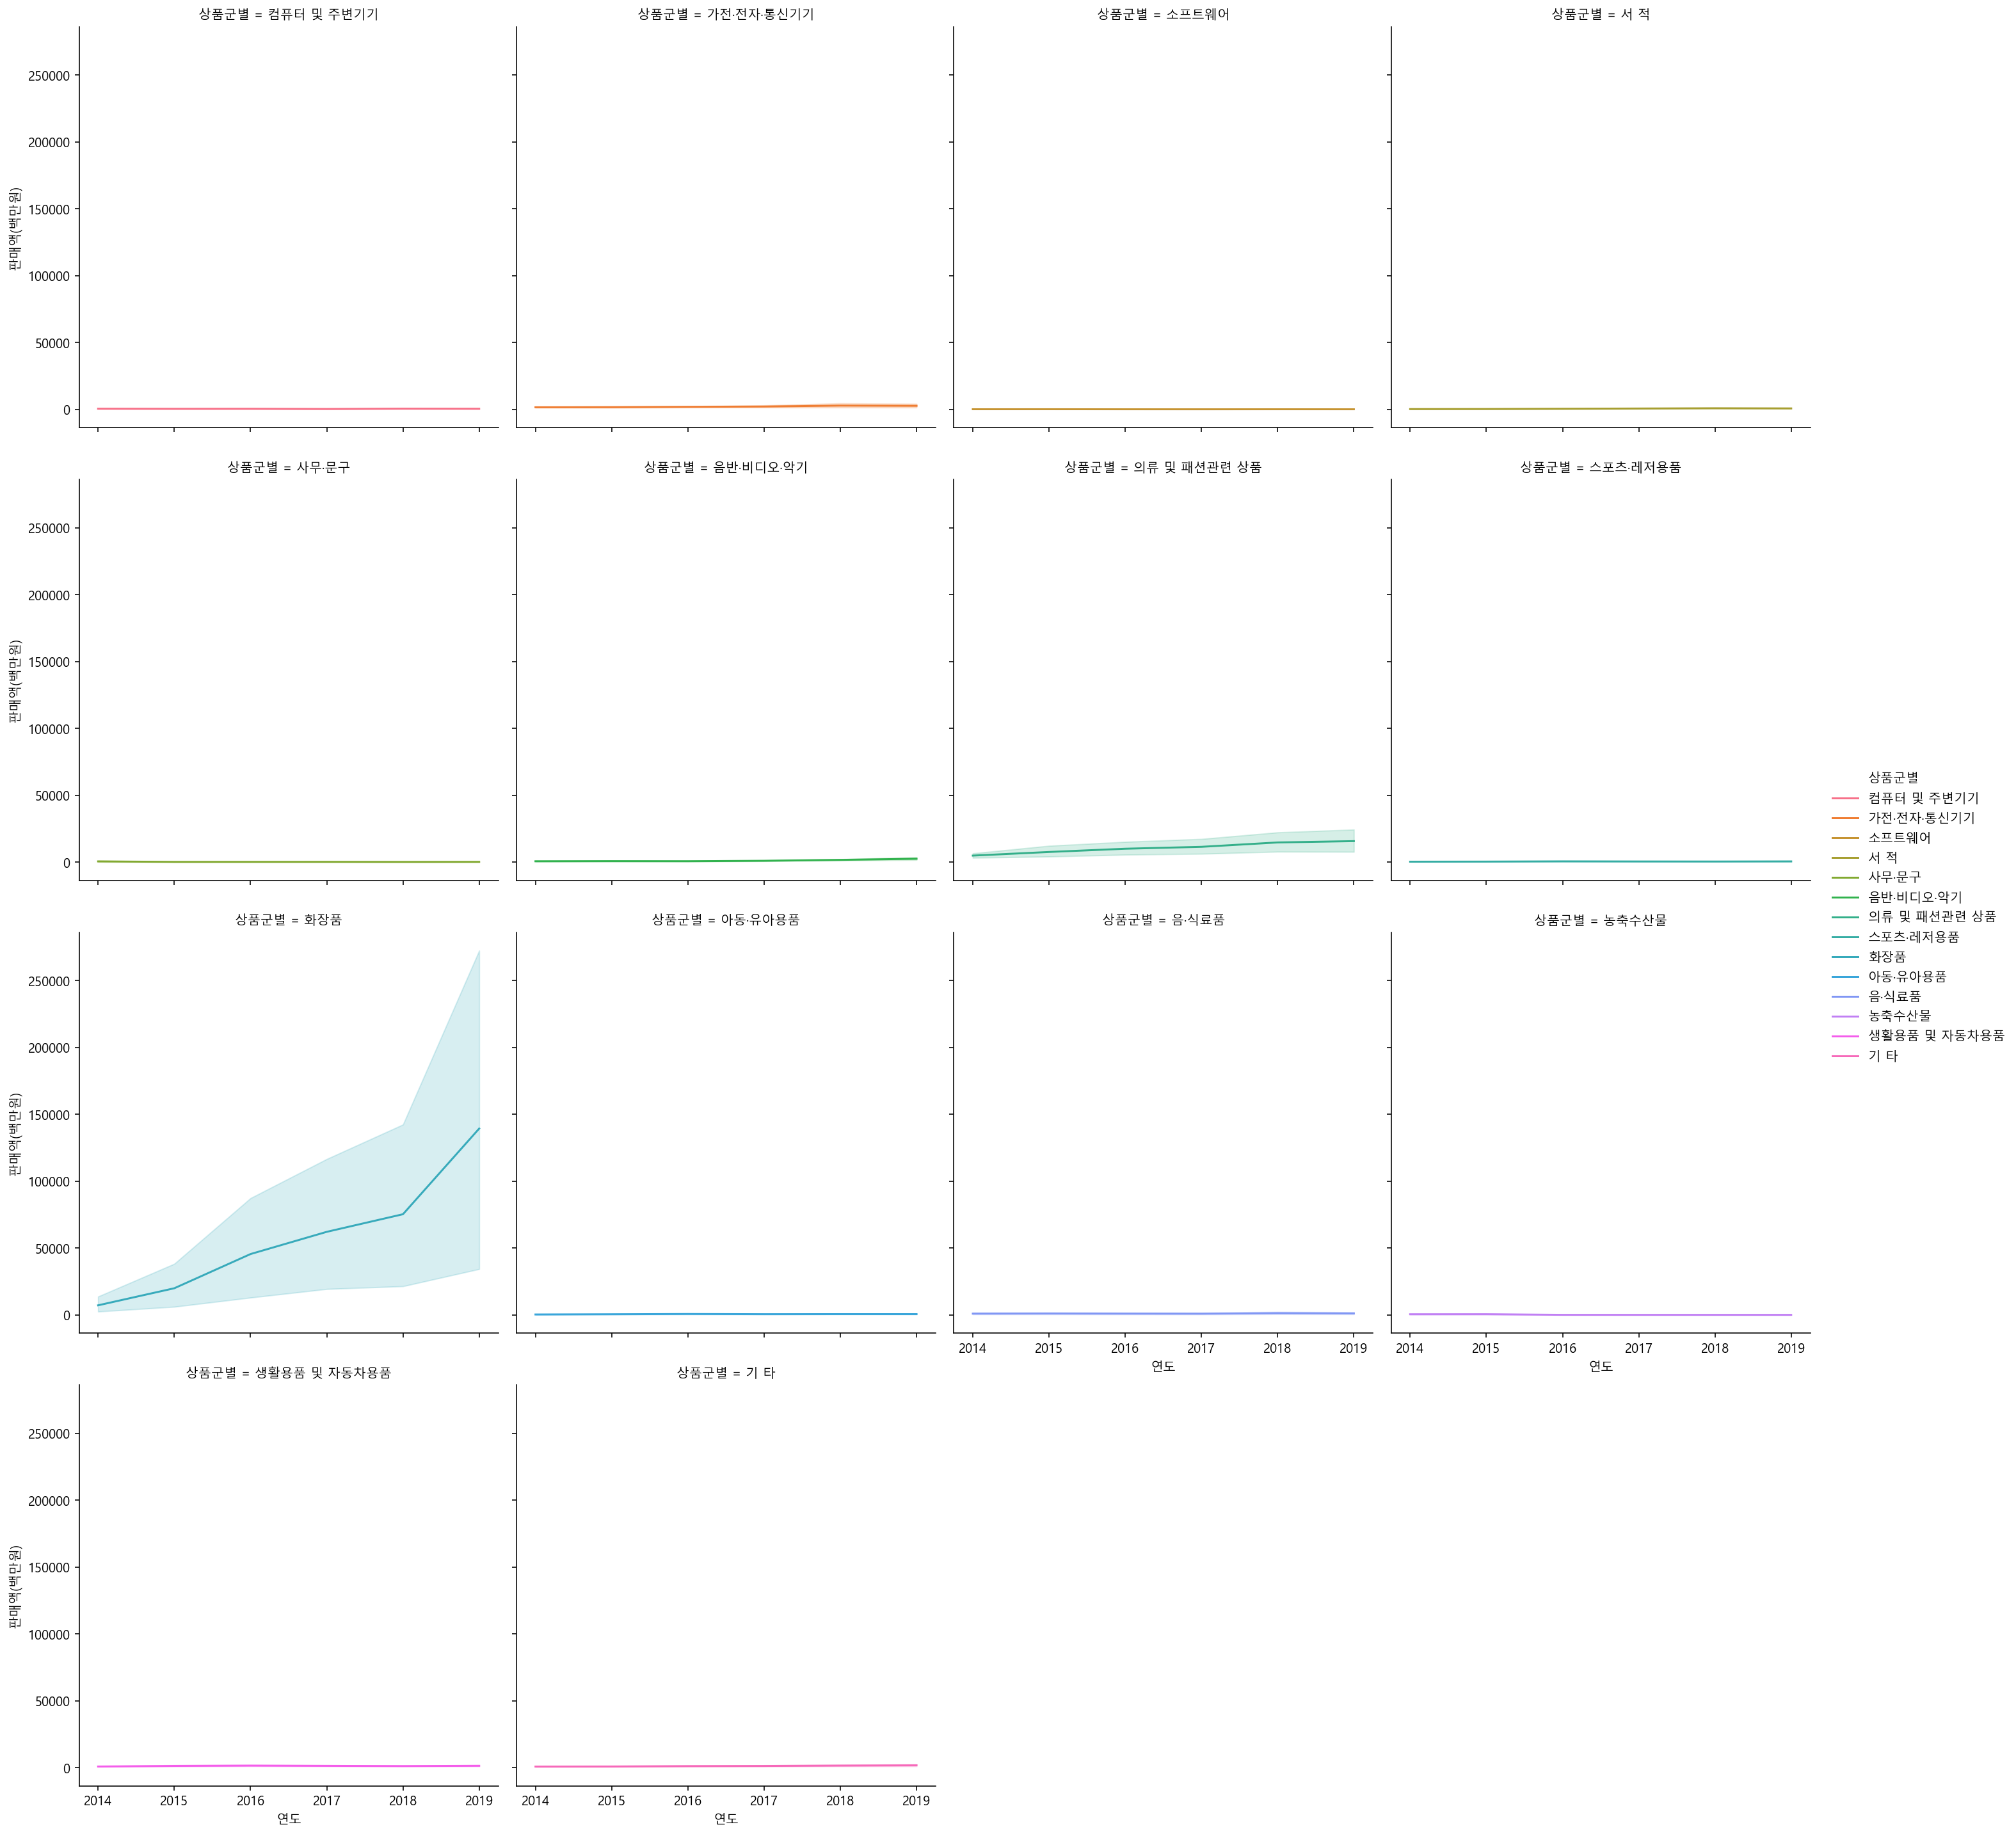

In [109]:
# 위의 그린 그래프는 밑에 뭉쳐있는 그래프를 제대로 볼수 없다.
# 이를 보기 위해서는 relplot을 사용한다.
plt.figure(figsize=(5,5))
sns.relplot(data=df_total, x='연도', y='판매액(백만원)',
           hue='상품군별', kind='line', col='상품군별', col_wrap=4)

In [118]:
# 화장품만 너무 큰 수치를 가지고 있어서 그래프의 수치가 미미해 보임
# 그러므로 화장품을 제외한 데이터를 만들어보자
# df_total[~df_total['상품군별'].isin(['화장품'])] : 같은 코드임
# df_sub = df_total[df_total['상품군별'] != ['화장품', '의류 및 패션관련 상품']].copy() : 이것은 동시 두 개의 항목이 제거가 안됨
# 즉 ['화장품', '의류 및 패션관련 상품']을 동시에 제거할 수 없다. 그러므로 isin 함수를 써야한다.
df_sub = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션관련 상품'])].copy()

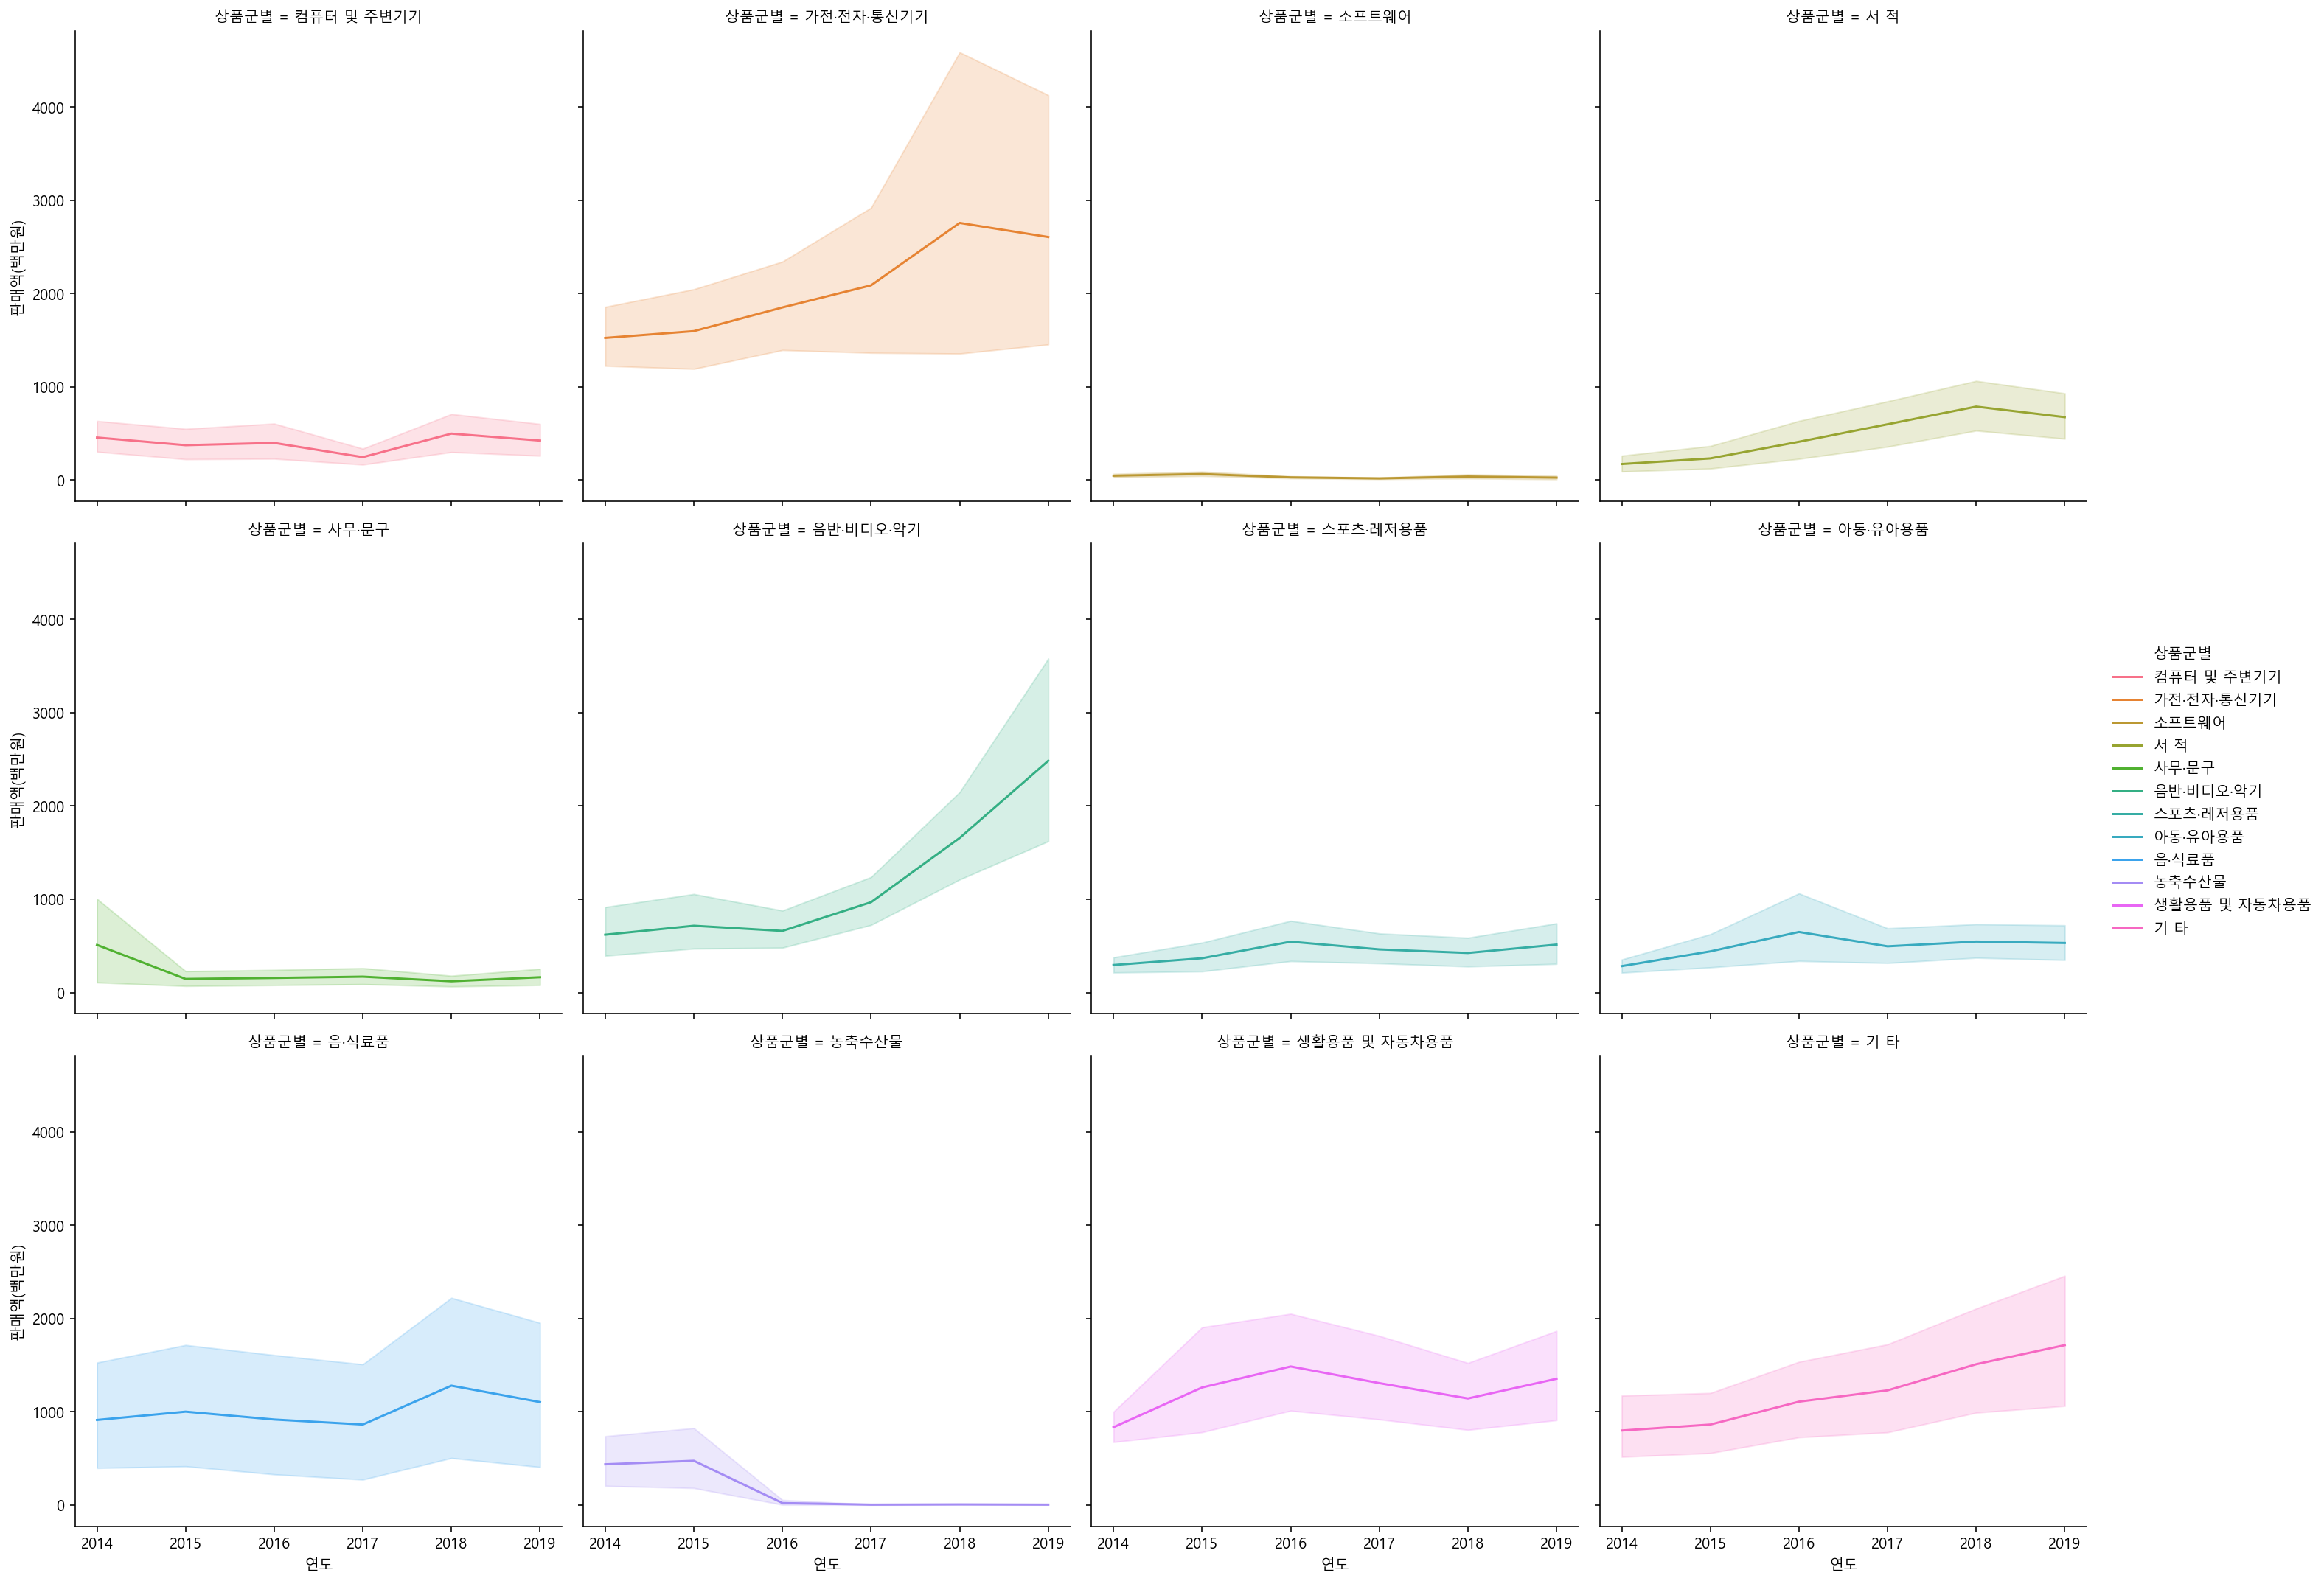

In [119]:
sns.relplot(data=df_sub, x='연도', y='판매액(백만원)',
           hue='상품군별', kind='line', col='상품군별', col_wrap=4)
# 화장품을 제외하니 의류 패션의 수치가 매우 높은 것으로 보임, 그러므로 의류 패션도 제외 하자
# 보면 가전 전자 통신기기도 높지만 위의 두 가지보다 상대적으로 낮으므로 위의 두 가지만 빼서 살펴보자

### 화장품 판매액

In [120]:
# 화장품 판매액만 가져와서 df_cosmetic으로 변수를 지정하기
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()

In [122]:
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

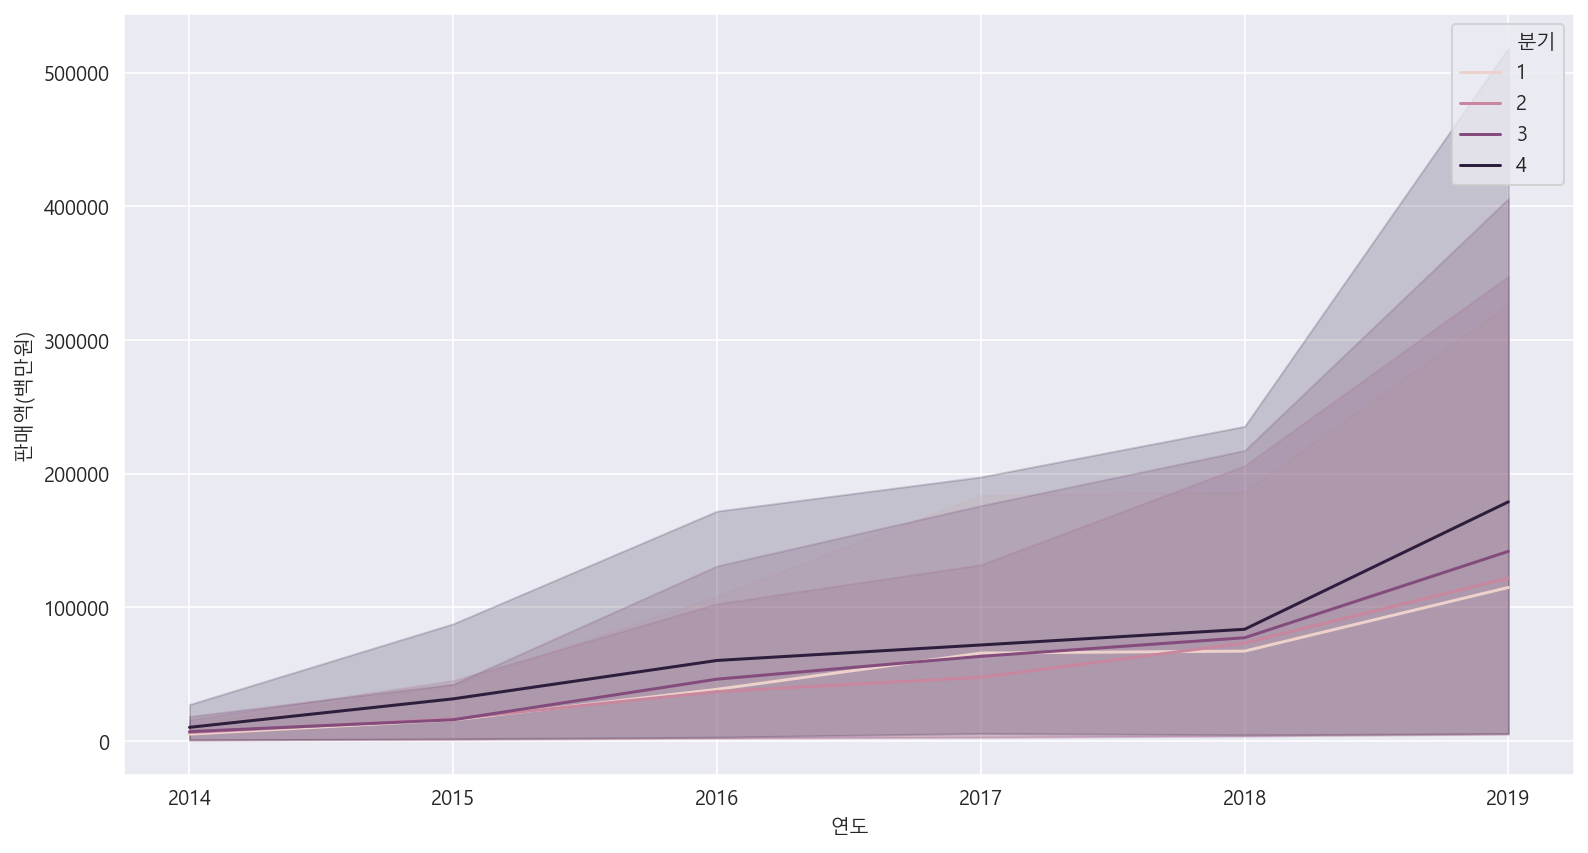

In [138]:
plt.figure(figsize=(13,7))
sns.lineplot(data=df_cosmetic, x='연도', y='판매액(백만원)', hue='분기')

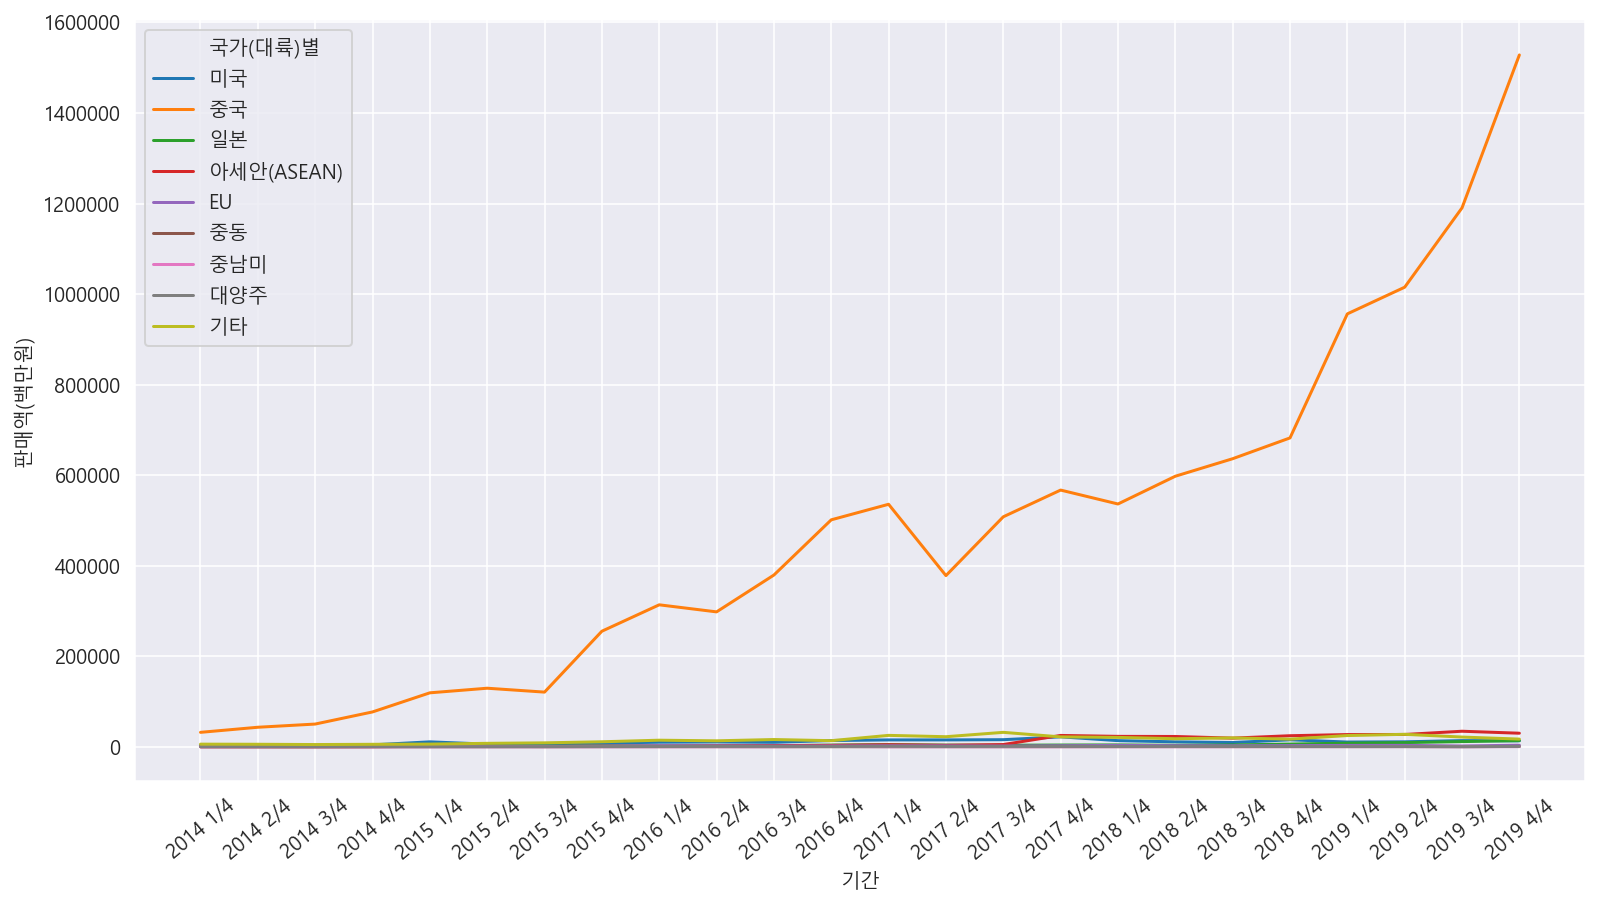

In [139]:
plt.figure(figsize=(13,7))
plt.xticks(rotation=40)
sns.lineplot(data=df_cosmetic, x='기간', y='판매액(백만원)', hue='국가(대륙)별')

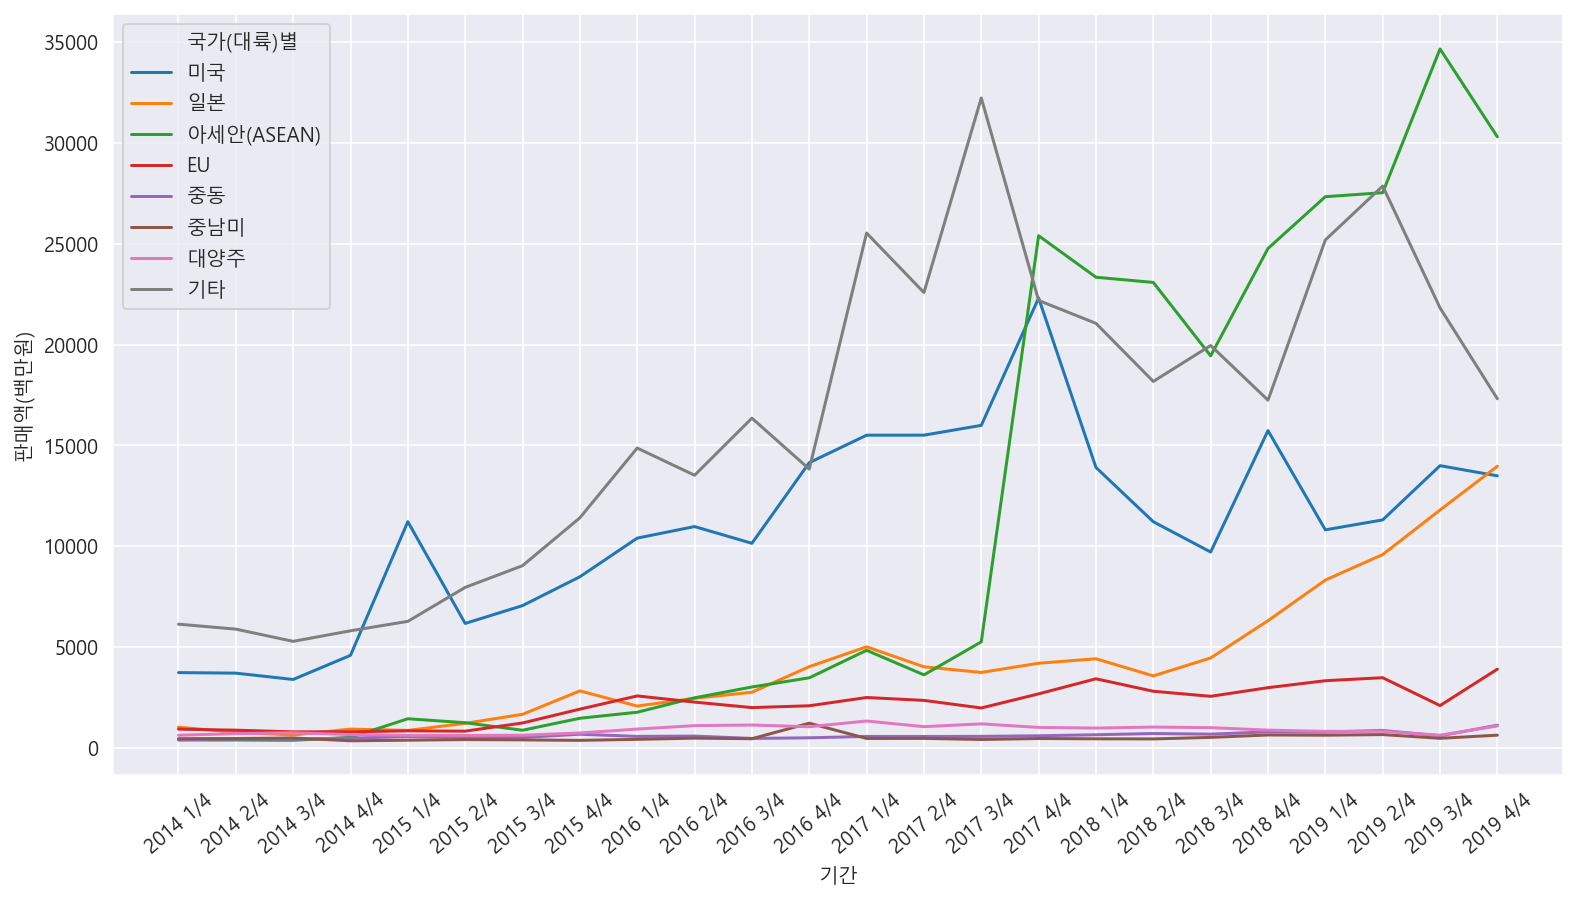

In [141]:
plt.figure(figsize=(13,7))
plt.xticks(rotation=40)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'],
             x='기간', y='판매액(백만원)', hue='국가(대륙)별')

In [149]:
df_total['판매유형별'].unique()

array(['계'], dtype=object)

In [152]:
df_sub1 = df_no2019[df_no2019['판매유형별'] != '계'].copy()

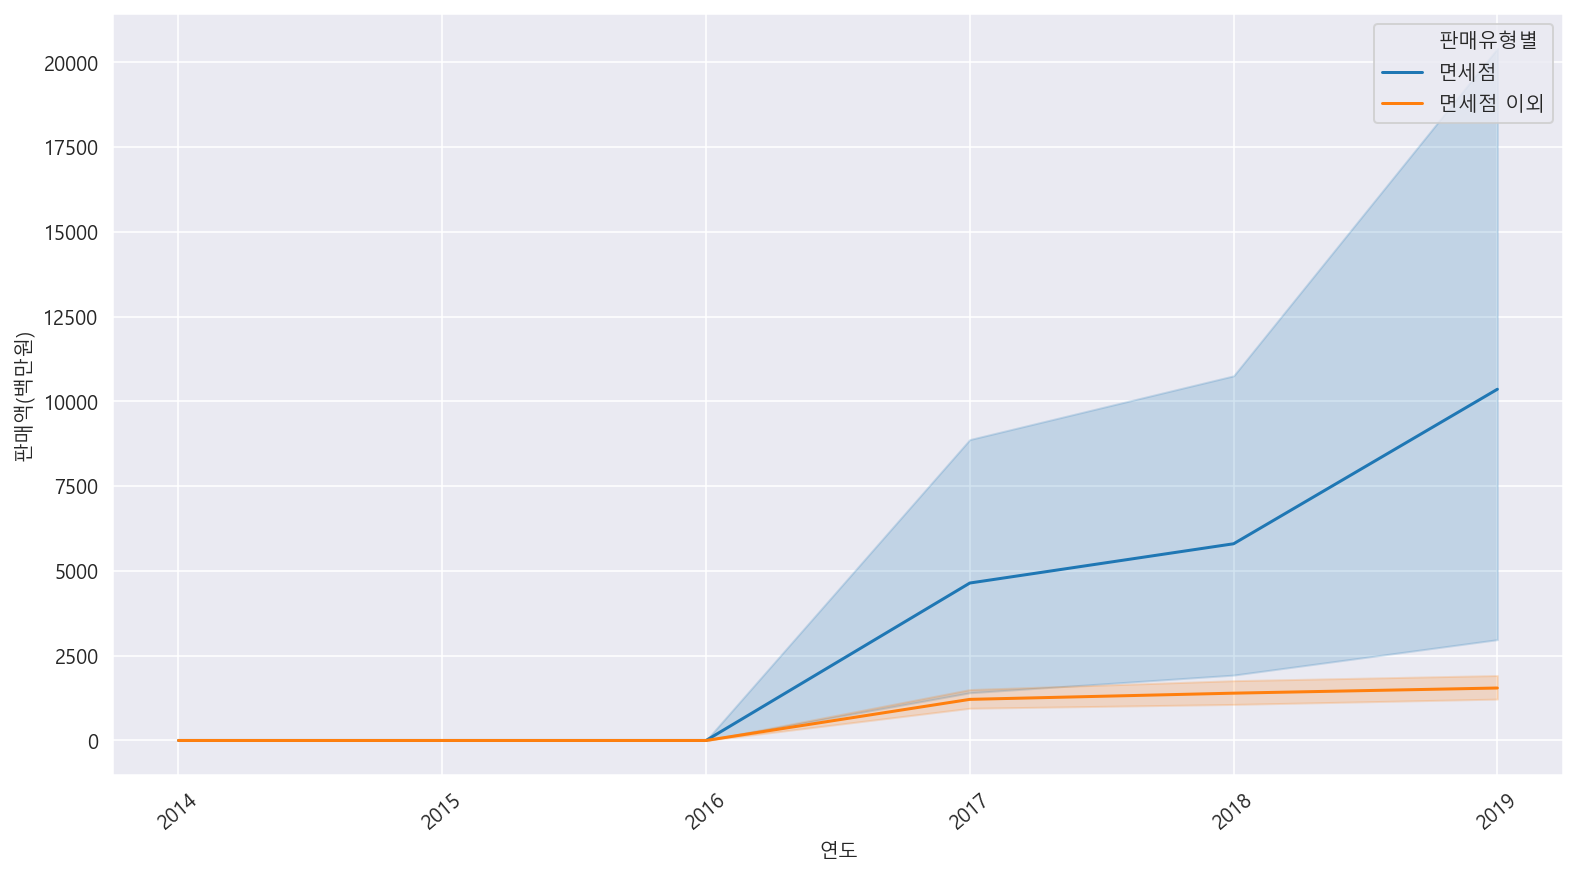

In [153]:
plt.figure(figsize=(13,7))
plt.xticks(rotation=40)
sns.lineplot(data=df_sub1, x='연도', y='판매액(백만원)', hue='판매유형별')

### 의류 및 패션 관련 상품 판매액

In [161]:
df_fashion = df_no2019[(df_no2019['상품군별'] == '의류 및 패션관련 상품') & (df_no2019['판매유형별'] == '계')].copy()

In [162]:
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


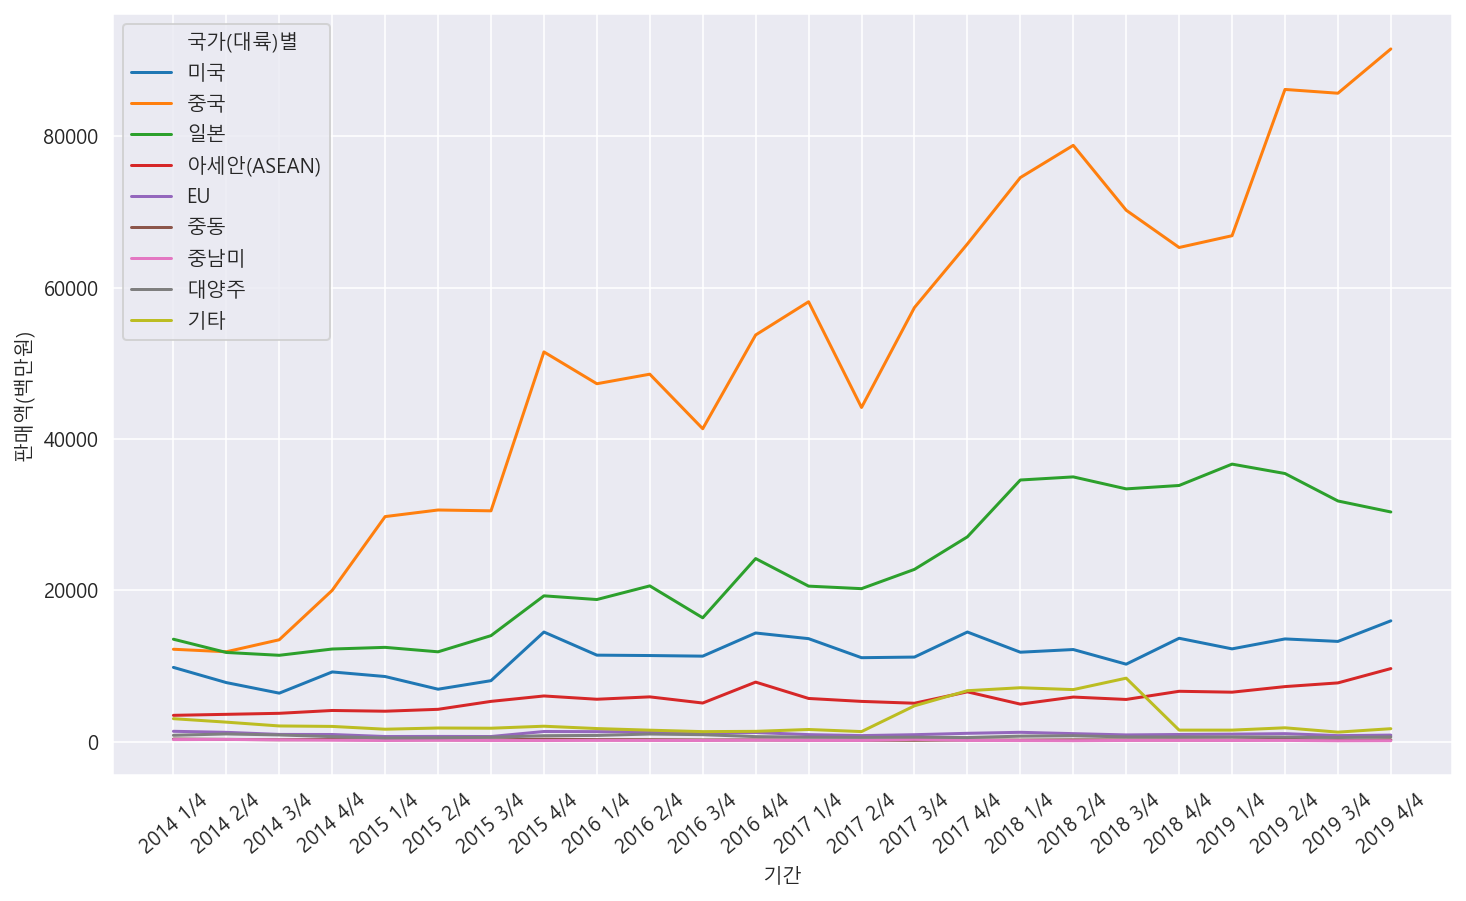

In [166]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=40)
sns.lineplot(data=df_fashion, x='기간', y='판매액(백만원)', hue='국가(대륙)별')

### 데이터 집계하기

In [170]:
df_fashion['판매유형별'].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [172]:
# 피봇테이블로 국가(대륙별), 연도별 합계 금액 표 구하기

result = df_fashion.pivot_table(index='국가(대륙)별', columns='연도', values='판매액(백만원)', aggfunc='sum')
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


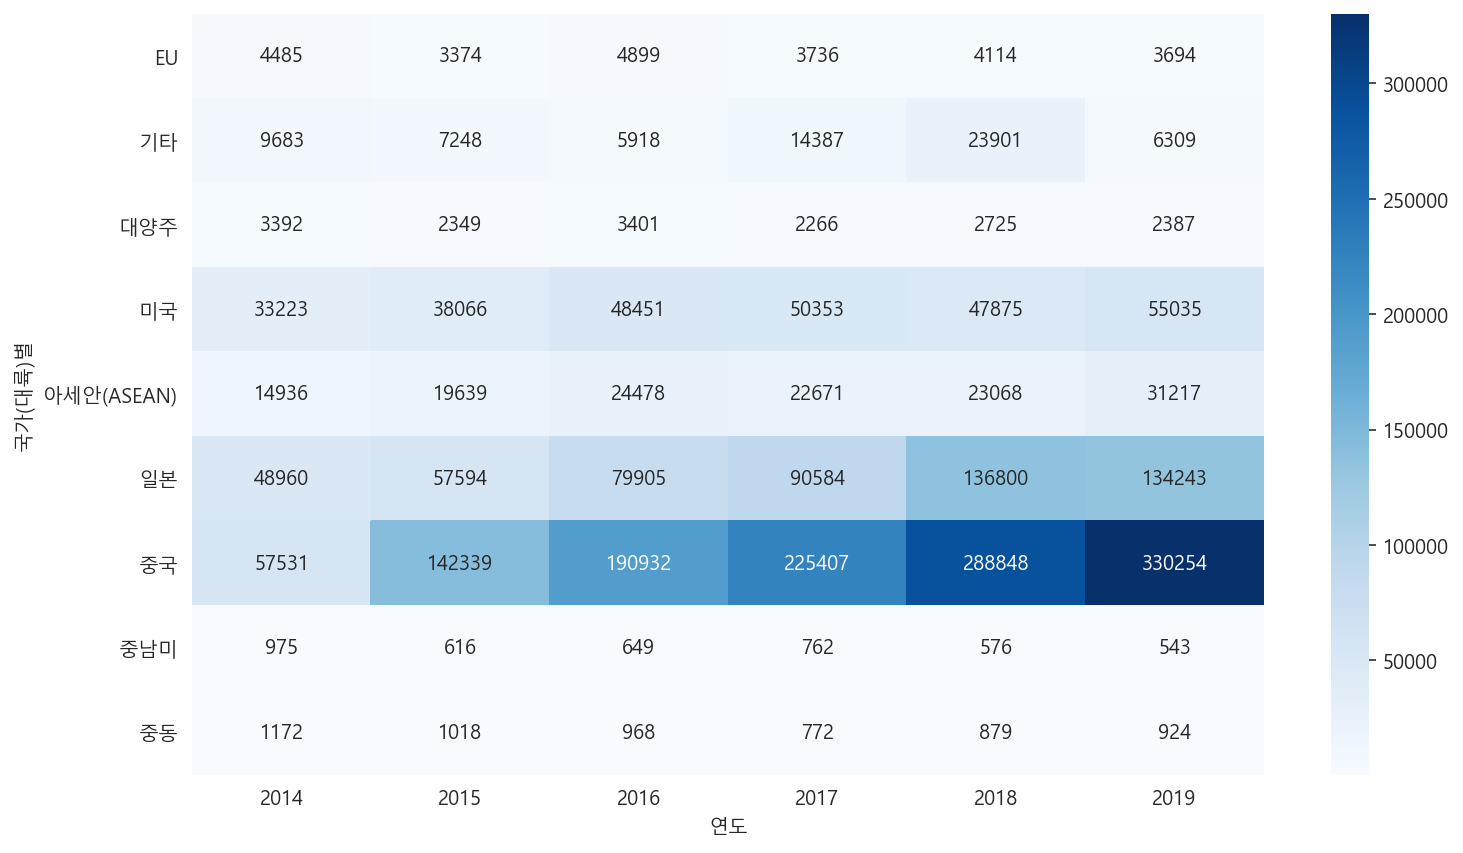

In [176]:
plt.figure(figsize=(12,7))
sns.heatmap(data=result, cmap='Blues', annot=True, fmt='.0f')

## 전체 상품군별로 온라인쇼핑 해외직접판매액이 증가했을까?

In [177]:
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


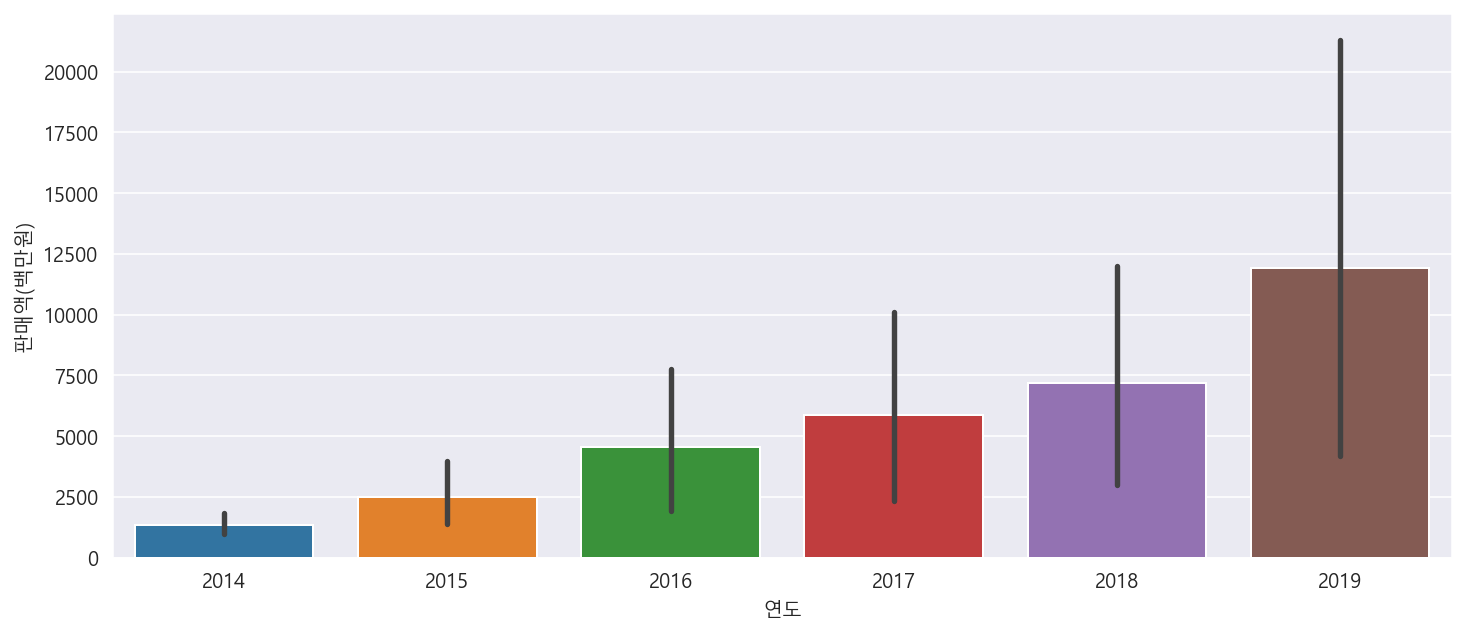

In [180]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_total, x='연도', y='판매액(백만원)')

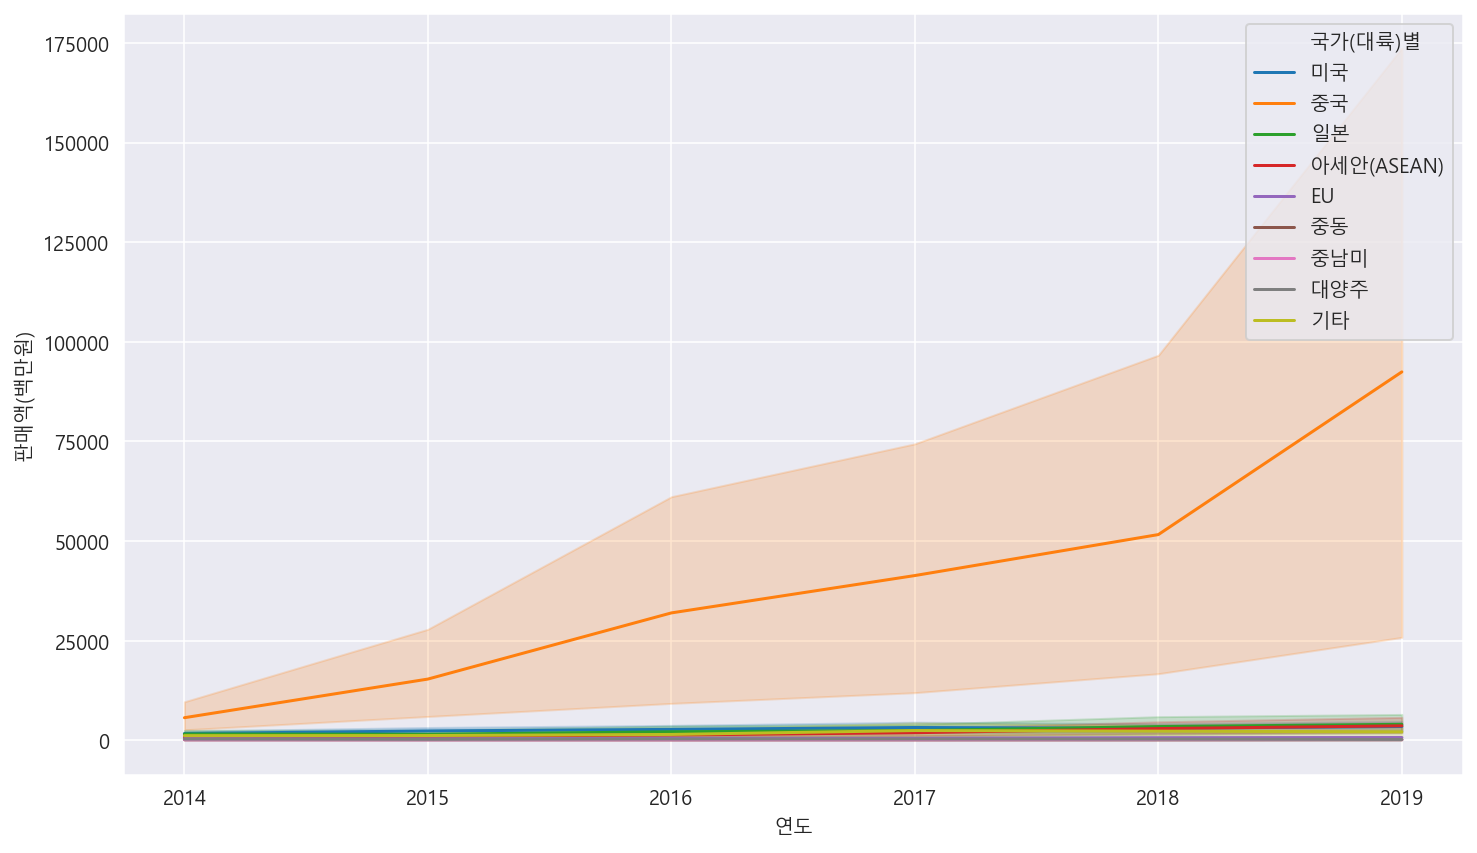

In [181]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_total, x='연도', y='판매액(백만원)', hue='국가(대륙)별')

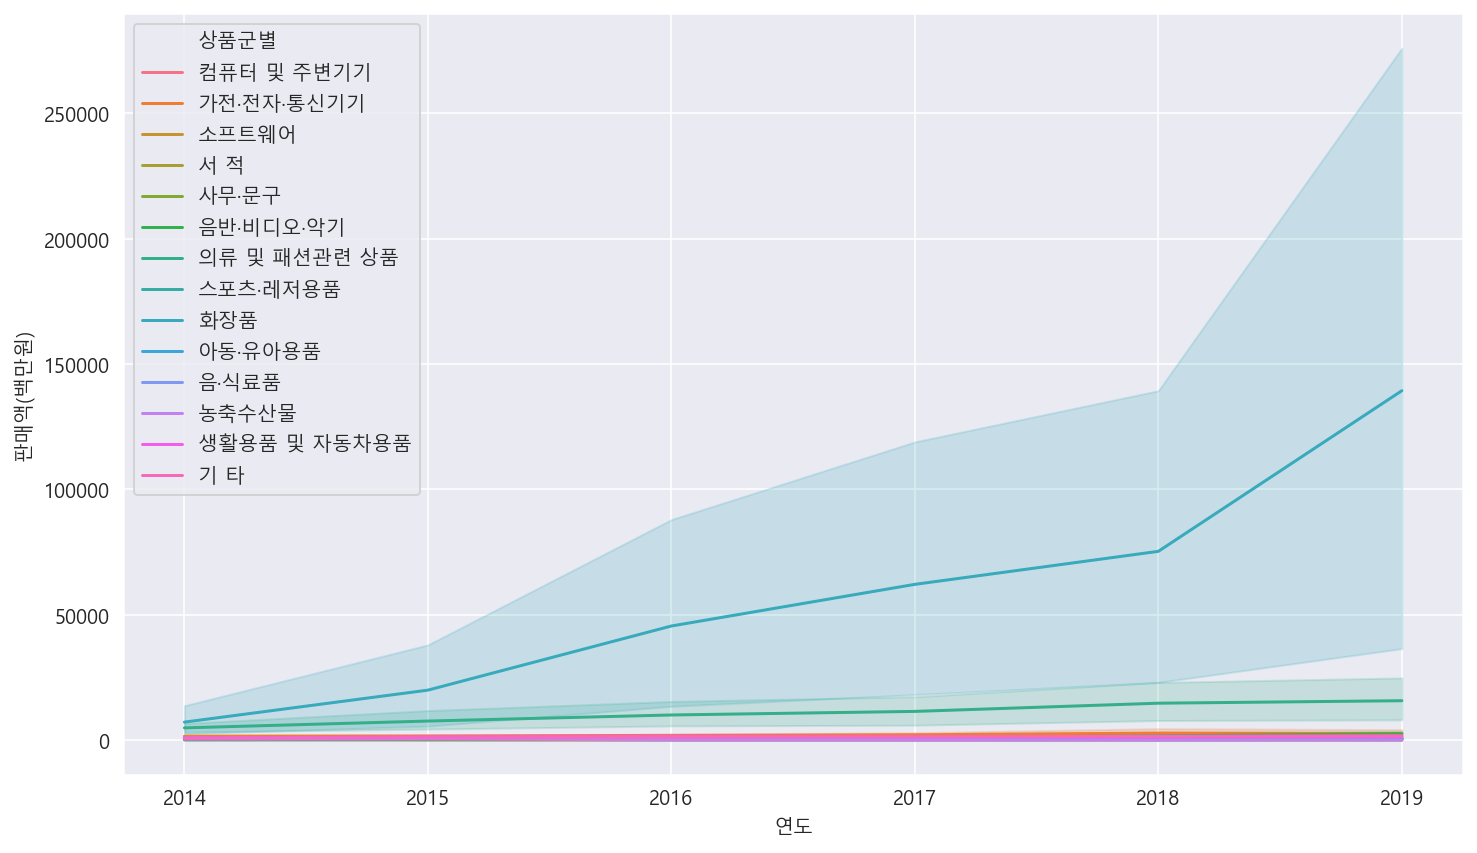

In [182]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_total, x='연도', y='판매액(백만원)', hue='상품군별')